Not maintaining Social Distancing


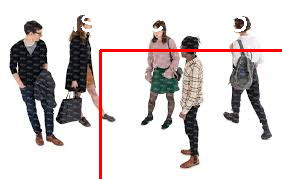

In [ ]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

def calculate_distance(bbox1, bbox2):
    # Indent the lines within the function
    center1 = (bbox1[0] + bbox1[2] // 2, bbox1[1] + bbox1[3] // 2)
    center2 = (bbox2[0] + bbox2[2] // 2, bbox2[1] + bbox2[3] // 2)
    distance = np.sqrt((center1[0] - center2[0])**2 + (center1[1] - center2[1])**2)
    return distance # Also indent this line

def draw_bounding_box(image, bbox, color):
    cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3]), color, 2)

image_path = ('image.jpeg')
if not os.path.exists(image_path):
    print(f"Error: Image file '{image_path}' not found.")
else:
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image '{image_path}'")
    else:
        bbox1 = (100, 50, 200, 150)
        bbox2 = (300, 200, 180, 120)

        draw_bounding_box(image, bbox1, (0, 255, 0))
        draw_bounding_box(image, bbox2, (0, 255, 0))

        distance = calculate_distance(bbox1, bbox2)

        if distance < 200:
            color = (0, 255, 0)
            print("Social Distancing")
        else:
            color = (0, 0, 255)
            print("Not maintaining Social Distancing")

        bbox_combined = (min(bbox1[0], bbox2[0]), min(bbox1[1], bbox2[1]),
                        max(bbox1[0] + bbox1[2], bbox2[0] + bbox2[2]) - min(bbox1[0], bbox2[0]),
                        max(bbox1[1] + bbox1[3], bbox2[1] + bbox2[3]) - min(bbox1[1], bbox2[1]))
        draw_bounding_box(image, bbox_combined, color)
        cv2.putText(image, f'Distance: {distance:.2f} pixels', (50, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        cv2_imshow(image)